In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
espn_df=pd.read_csv('/workspaces/final-project-22022658NguyenTienKhoi/Data/ESPN.csv')

In [9]:
processed_df = espn_df.dropna(subset='reactions')

In [10]:
processed_df

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,897833491712256,"Nine days after being placed on paid leave, he...","Nine days after being placed on paid leave, he...","ESPN.COM\nFarden out as gymnastics coach, Utah...",NaN,2023-11-22 14:18:19,1700662699,NaN,https://external-xsp1-2.xx.fbcdn.net/emg1/v/t1...,[],...,https://www.facebook.com/ESPN/posts/8978334917...,"{'thích': 21, 'yêu thích': 2, 'haha': 2, 'wow'...",29,NaN,104266592953439,NaN,NaN,[],False,2023-11-22 14:45:41.904892
1,897586535070285,EAST CAROLINA WINS IT ON THE HALFCOURT HEAVE 🎴...,EAST CAROLINA WINS IT ON THE HALFCOURT HEAVE 🎴...,NaN,NaN,2023-11-22 01:56:01,1700618161,NaN,https://scontent-xsp1-2.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/ESPN/posts/8975865350...,"{'thích': 2344, 'yêu thích': 457, 'haha': 20, ...",3214,NaN,104266592953439,NaN,NaN,[],False,2023-11-22 14:45:53.891753
2,1766045677171890,Welcome back to another episode of Rankings Re...,Welcome back to another episode of Rankings Re...,NaN,NaN,2023-11-22 00:58:55,1700614735,NaN,https://scontent-xsp2-1.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/ESPN/posts/1766045677...,"{'thích': 147, 'yêu thích': 18, 'haha': 3, 'ph...",169,NaN,104266592953439,NaN,NaN,[],False,2023-11-22 14:47:17.063346
3,897546935074245,Here’s how the College Football Playoff rankin...,Here’s how the College Football Playoff rankin...,NaN,NaN,2023-11-22 00:17:40,1700612260,https://scontent-xsp1-2.xx.fbcdn.net/v/t39.308...,https://scontent-xsp1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-xsp1-2.xx.fbcdn.net/v/t39.3...,...,https://www.facebook.com/ESPN/posts/8975469350...,"{'thích': 2875, 'yêu thích': 356, 'haha': 185,...",3534,NaN,104266592953439,NaN,8.975469e+14,['897546921740913'],False,2023-11-22 14:48:00.739631
4,897472645081674,Shohei Ohtani wants to keep his free agency pr...,Shohei Ohtani wants to keep his free agency pr...,NaN,Shohei Ohtani wants to keep his free agency pr...,2023-11-21 19:57:43,1700596663,https://m.facebook.com/photo/view_full_size/?f...,https://scontent-xsp2-1.xx.fbcdn.net/v/t39.308...,['https://m.facebook.com/photo/view_full_size/...,...,https://www.facebook.com/ESPN/posts/8974726450...,"{'thích': 7720, 'yêu thích': 379, 'haha': 1434...",9942,NaN,104266592953439,NaN,8.974726e+14,['897472628415009'],False,2023-11-22 14:49:42.960855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,894612222034383,Breaking: MLB owners voted Thursday to allow t...,Breaking: MLB owners voted Thursday to allow t...,NaN,Breaking: MLB owners voted Thursday to allow t...,2023-11-16 15:01:10,1700146870,https://scontent-xsp2-1.xx.fbcdn.net/v/t39.308...,https://scontent-xsp2-1.xx.fbcdn.net/v/t39.308...,['https://scontent-xsp2-1.xx.fbcdn.net/v/t39.3...,...,https://www.facebook.com/ESPN/posts/8946122220...,"{'thích': 10928, 'yêu thích': 586, 'haha': 537...",17362,NaN,104266592953439,NaN,8.946122e+14,['894612205367718'],False,2023-11-22 15:52:47.124380
70,894611732034432,"This Native American Heritage Month, we celebr...","This Native American Heritage Month, we celebr...",NaN,NaN,2023-11-16 15:00:02,1700146802,https://scontent-xsp1-2.xx.fbcdn.net/v/t39.308...,https://scontent-xsp1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-xsp1-2.xx.fbcdn.net/v/t39.3...,...,https://www.facebook.com/ESPN/posts/8946117320...,"{'thích': 63531, 'yêu thích': 12850, 'haha': 4...",77719,NaN,104266592953439,NaN,8.946117e+14,['894611705367768'],False,2023-11-22 15:56:34.949706
71,894397855389153,The Sacramento Kings get the job done in LA 🙌\...,The Sacramento Kings get the job done in LA 🙌\...,NaN,The Sacramento Kings get the job done in LA 🙌,2023-11-16 05:27:44,1700112464,https://scontent-xsp1-2.xx.fbcdn.net/v/t39.308...,https://scontent-xsp1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-xsp1-2.xx.fbcdn.net/v/t39.3...,...,https://www.f

In [11]:
reactions = processed_df['reactions']
react = []
for i in range(74):
    state = dict(eval(reactions.iloc[i]))
    react.append(state['thích'] + state['yêu thích'])
posi_react = pd.Series(react)


<Axes: >

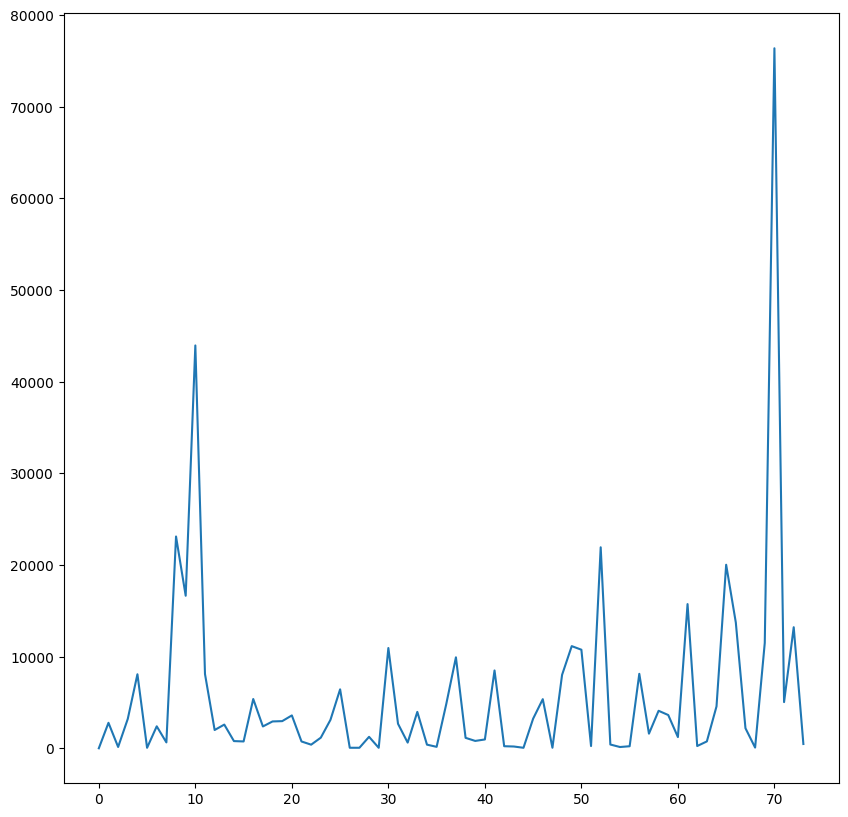

In [13]:
posi_react.plot(kind = 'line',figsize=(10,10))

<Axes: >

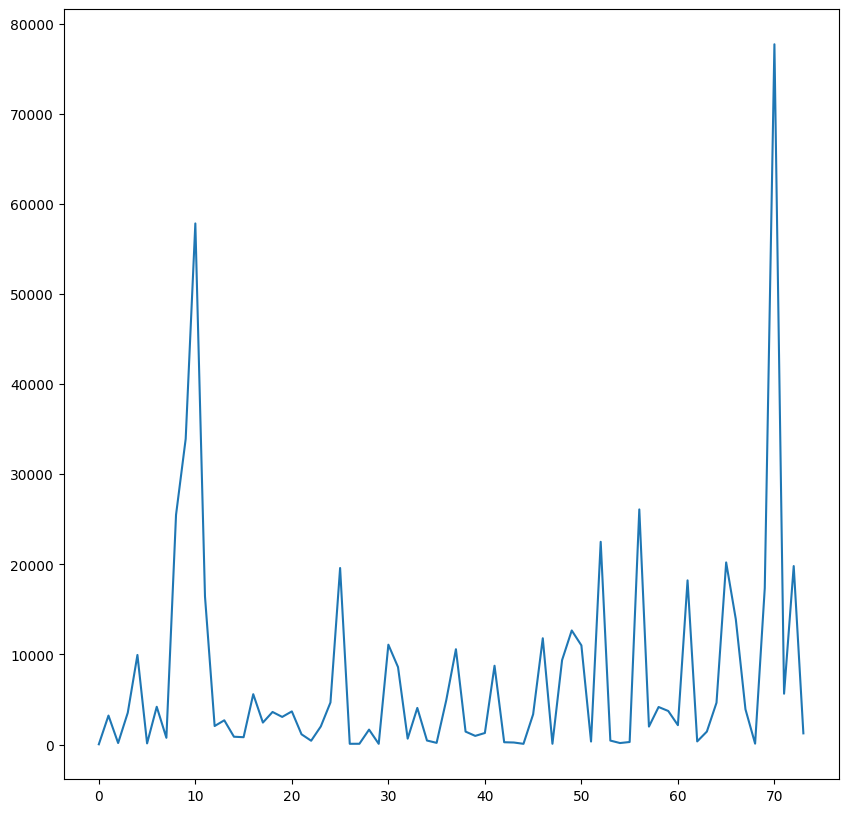

In [14]:
processed_df['reaction_count'].plot(kind='line',figsize=(10,10))

In [22]:
print(processed_df.iloc[56]['reactions'])
print(processed_df.iloc[56]['post_text'])

Breaking: Cincinnati Bengals head coach Zac Taylor announced that Joe Burrow will miss the rest of the season with a torn ligament.


/tmp/ipykernel_1908/609838652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['time'] = pd.to_datetime(processed_df['time'])


Text(0, 0.5, 'positive reaction')

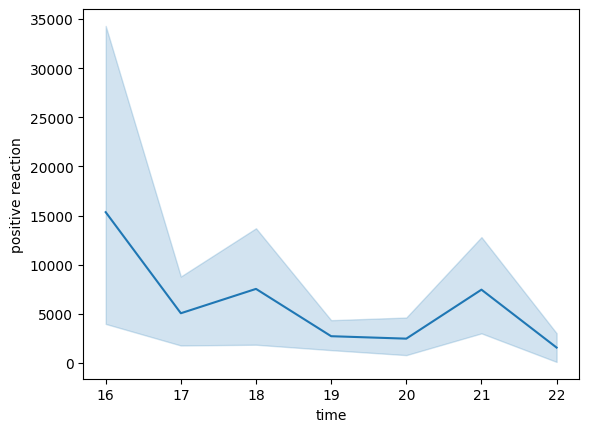

In [19]:
processed_df['time'] = pd.to_datetime(processed_df['time'])
ax = sns.lineplot(x=processed_df['time'].dt.day,y = posi_react)
ax.set_ylabel("positive reaction")

/tmp/ipykernel_1908/1344972798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['time'] = pd.to_datetime(processed_df['time'])


Text(0, 0.5, 'positive reaction')

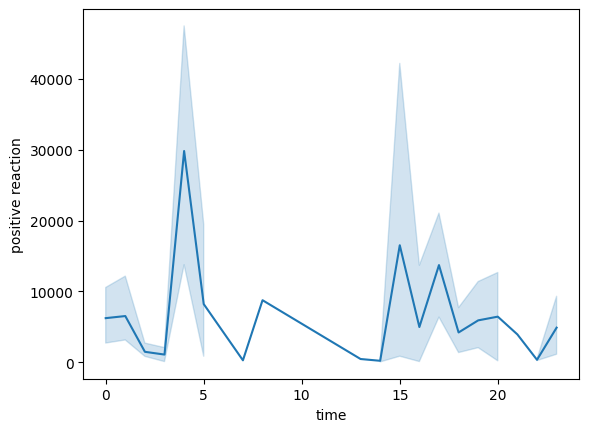

In [16]:
processed_df['time'] = pd.to_datetime(processed_df['time'])
ax = sns.lineplot(x=processed_df['time'].dt.hour,y = processed_df['reaction_count'])
ax.set_ylabel("positive reaction")

KeyError: 'phẫn nộ'